# Titanic Dataset Analysis

## Introduction
The Titanic disaster is one of the worst navigation accidents in history, and it is one of the most studied accidents. In this project, I aim to analyze and explain the Titanic Dataset to determine the factors that increased the chances of survival. Throughout the analysis, I will explain the terms in the dataset, the code, and the plots for better understanding.

Main goal: Finding the best factor of survival by studying the relationships between the variables.

## Table of Contents

1. Dataset Terms Explanation

2. Data Overview

3. Data Cleaning

4. Data Visualization

5. Data Summary and Survival Factors

6. Logistic Regression

7. AI-based Missing Data Handling


## 1. Dataset Terms Explanation
*The dataset has 12 columns, as follows:*
- PassengerID: Passenger ID.
- Survived: Whether survived or not (0 = No, 1 = Yes).
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
- Name: Name of the passenger.
- Sex: Gender of the passenger.
- Age: Age in years.
- SibSp: Number of siblings/spouses aboard the Titanic.
- Parch: Number of parents/children aboard the Titanic.
- Ticket: Ticket number.
- Fare: Passenger fare.
- Cabin: Passenger cabin.
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## 2. Data Overview
In this section, the first 5 values of the dataset are shown below. But we can't learn much from them, so to figure out how many missing values are in each column, we can write simple code to find the sum of the NULL values in each column, as shown below.

It appears that columns Age, Cabin, and Embarked have missing values. In the next section, we will discuss how to deal with them.

In [1]:
import pandas as pd
df = pd.read_csv("../Data/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. Data Cleaning
We learned from the previous section that columns Age, Cabin, and Embarked have missing values:
- For column Cabin (~77% of values are missing), I dropped it (Deleted it).
- For column Age (~20% of values are missing), we will also drop it (for now), as it is acceptable until the ML section.
- For column Embarked (~0.2% of values are missing), I fill in the 2 missing entries with the mode (most repeated value).

After applying the code, we can see that the missing values and column Cabin don't exist anymore; this will bring our total passenger count to 714 from 891.

In [3]:
df.drop(columns=['Cabin'], inplace=True)

In [4]:
df = df.dropna(subset=['Age'])

In [5]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


## 4. Data Visualization
After cleaning the data and handling the missing values, we can now start visualizing it to see the plots and relationships.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

### 4.1 Univariate Analysis (Single Variable)
Goal: Understanding the distribution of individual features.

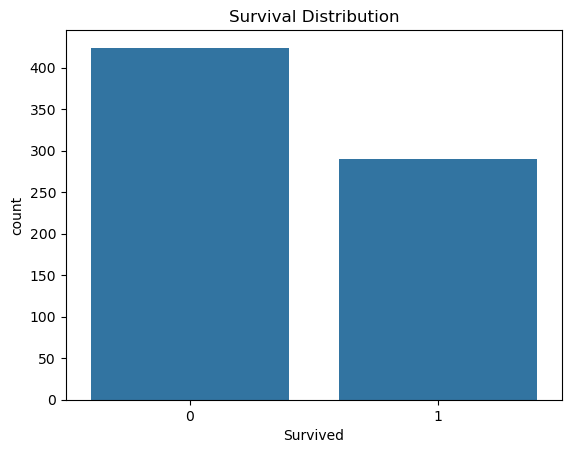

Tragically, out of the 891 of the known passengers that are in this dataset just 290 survived, and 424 died. But the real mortality count is estimated to be between 1490-1635.
Survival percentage: 40.62%, Mortality rate: 59.38%


In [9]:
sns.countplot(df, x='Survived')
plt.title('Survival Distribution')
plt.show()
survived = df[df['Survived'] == 1].shape[0]
died = df[df['Survived'] == 0].shape[0]
survival_perc = survived / 714 * 100
death_perc = died / 714 * 100
print(f"Tragically, out of the 891 of the known passengers that are in this dataset just {survived} survived, and {died} died. But the real mortality count is estimated to be between 1490-1635.")
print(f"Survival percentage: {round(survival_perc, 2)}%, Mortality rate: {round(death_perc, 2)}%")

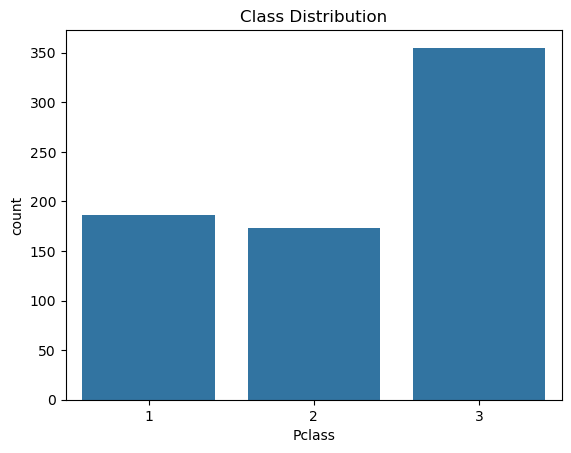

First class count: 186, Second class count: 173, Third class count: 355.


In [10]:
sns.countplot(df, x='Pclass')
plt.title('Class Distribution')
plt.show()
firstClass= df[df['Pclass'] == 1].shape[0]
secondClass= df[df['Pclass'] == 2].shape[0]
thirdClass= df[df['Pclass'] == 3].shape[0]
print(f"First class count: {firstClass}, Second class count: {secondClass}, Third class count: {thirdClass}.")

This shows that 24.2% are in 1st class, 20.7% are in 2nd class, and the remaining 55.1% are in 3rd class. We will see in the next section how this information will be relevent to us.

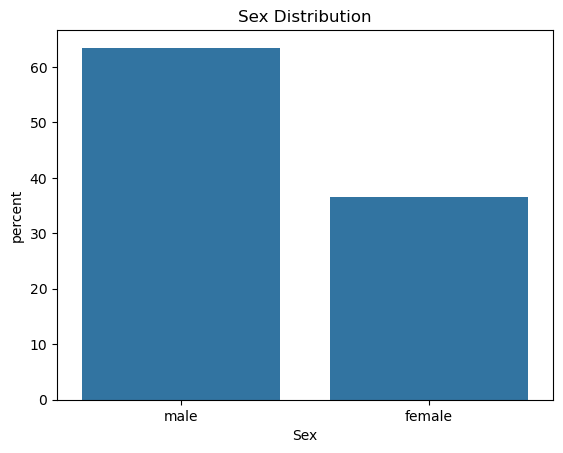

Male percentage: 63.45%, Female percentage: 36.55%


In [11]:
sns.countplot(df, x='Sex', stat='percent')
plt.title('Sex Distribution')
plt.show()
male = df[df['Sex'] == 'male'].shape[0]
female= df[df['Sex'] == 'female'].shape[0]
male_perc = male / 714 * 100
female_perc = female / 714 * 100
print(f"Male percentage: {round(male_perc, 2)}%, Female percentage: {round(female_perc, 2)}%")


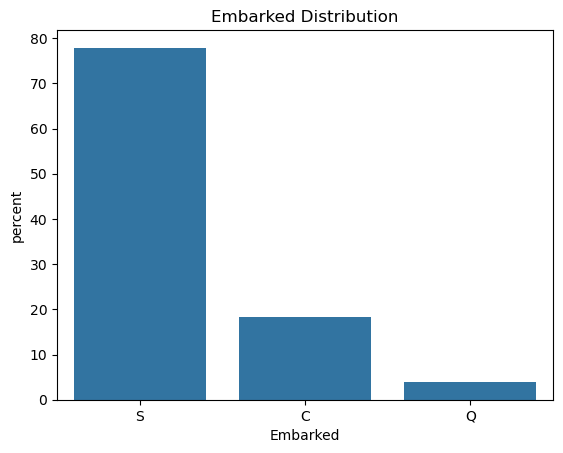

More than 70% of the Titanic passengers embarked from Southampton


In [12]:
sns.countplot(df, x='Embarked', stat='percent')
plt.title('Embarked Distribution')
plt.show()
print('More than 70% of the Titanic passengers embarked from Southampton')

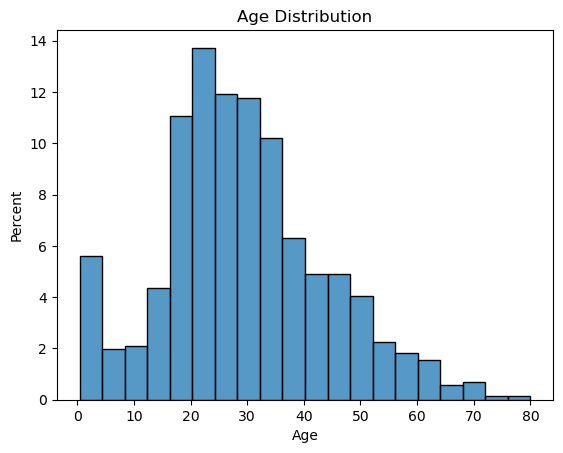

In the next sections, an Age Group variable will be created for better understanding of the distribution


In [13]:
sns.histplot(df, x='Age', stat='percent')
plt.title('Age Distribution')
plt.show()
print("In the next sections, an Age Group variable will be created for better understanding of the distribution")

### 4.2 Bivariate Analysis (2 Variables)
Goal: Explore relationships with survival.

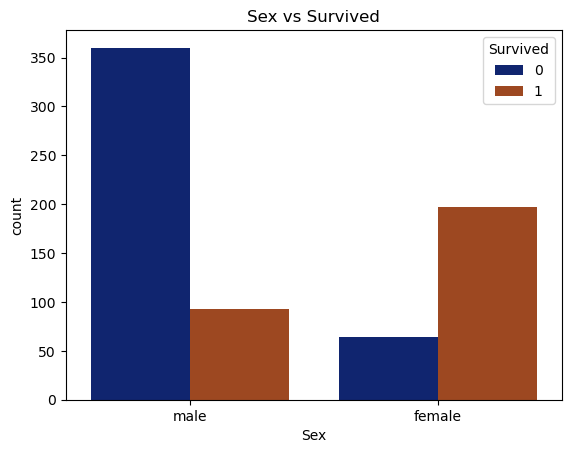

Male Survivors Count: 93, Male Deaths Count: 360
Female Survivors Count: 197, Female Deaths Count: 64
Females had a survival margin of 54.95% over males.


In [14]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='dark')
plt.title('Sex vs Survived')
plt.show()

alive_males = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
dead_males = df[(df['Sex'] == 'male') & (df['Survived'] == 0)].shape[0]

alive_females = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
dead_females = df[(df['Sex'] == 'female') & (df['Survived'] == 0)].shape[0]

print(f"Male Survivors Count: {alive_males}, Male Deaths Count: {dead_males}")
print(f"Female Survivors Count: {alive_females}, Female Deaths Count: {dead_females}")
male_death_rate = df[df['Sex'] == 'male']['Survived'].value_counts(normalize=True)[0]
female_death_rate = df[df['Sex'] == 'female']['Survived'].value_counts(normalize=True)[0]

margin_of_survival = male_death_rate - female_death_rate
print(f"Females had a survival margin of {margin_of_survival:.2%} over males.")


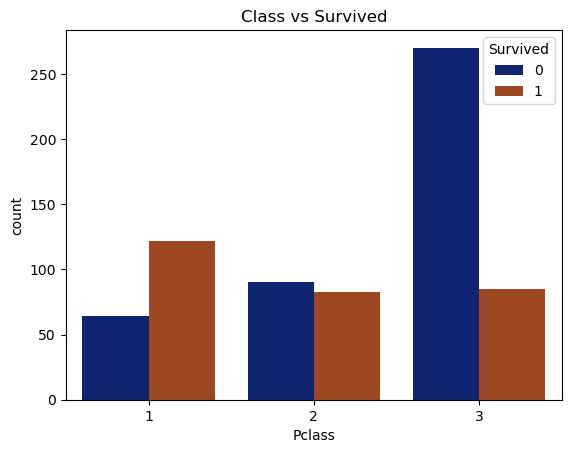

First Class Survivors Count: 122, First Class Deaths Count: 64
Second Class Survivors Count: 83, Second Class Deaths Count: 90
Third Class Survivors Count: 85, Third Class Deaths Count: 270


0.34408602150537637

In [15]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='dark')
plt.title('Class vs Survived')
plt.show()

first_class_sorvivors = df[(df['Pclass'] == 1) & (df['Survived'] == 1)].shape[0]
first_class_deaths = df[(df['Pclass'] == 1) & (df['Survived'] == 0)].shape[0]

second_class_sorvivors = df[(df['Pclass'] == 2) & (df['Survived'] == 1)].shape[0]
second_class_deaths = df[(df['Pclass'] == 2) & (df['Survived'] == 0)].shape[0]

third_class_sorvivors = df[(df['Pclass'] == 3) & (df['Survived'] == 1)].shape[0]
third_class_deaths = df[(df['Pclass'] == 3) & (df['Survived'] == 0)].shape[0]
print(f"First Class Survivors Count: {first_class_sorvivors}, First Class Deaths Count: {first_class_deaths}")
print(f"Second Class Survivors Count: {second_class_sorvivors}, Second Class Deaths Count: {second_class_deaths}")
print(f"Third Class Survivors Count: {third_class_sorvivors}, Third Class Deaths Count: {third_class_deaths}")

firstClass_death_rate = df[df['Pclass'] == 1]['Survived'].value_counts(normalize=True)[0]
secondClass_death_rate = df[df['Pclass'] == 2]['Survived'].value_counts(normalize=True)[0]
thirdClass_death_rate = df[df['Pclass'] == 3]['Survived'].value_counts(normalize=True)[0]

firstClass_death_rate


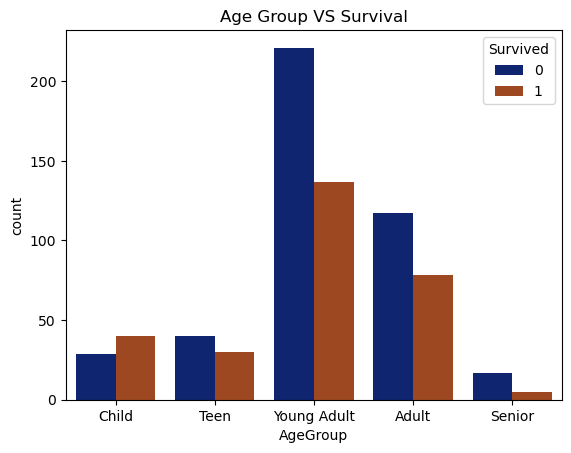

In [16]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,100], labels= ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.countplot(x='AgeGroup', hue='Survived', palette='dark', data=df)
plt.title('Age Group VS Survival')
plt.show()


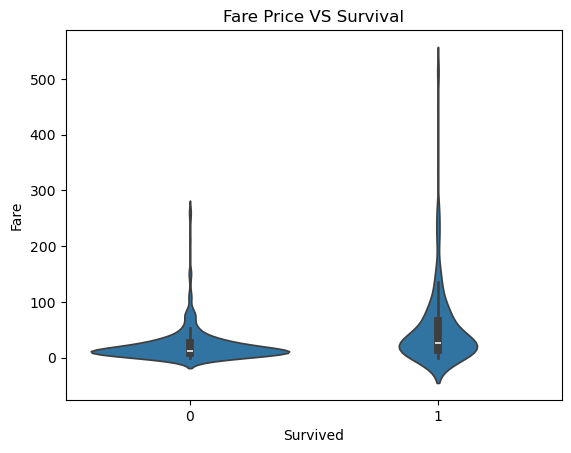

In [17]:
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Fare Price VS Survival')
plt.show()

### 4.3 Multivariate Analysis (3+ Variables)
Goal: Visualize combinations that affect survival

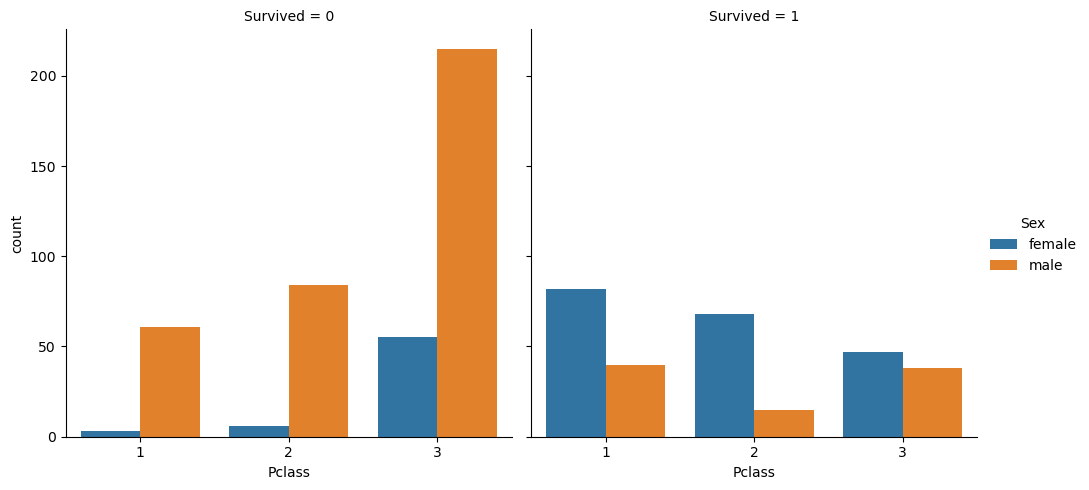

In [18]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')
plt.show()

The figure above is the Relationship between Class, Sex, and Survival rate. It clearly shows that being a 1st class female is best for survival, and shows that the opposite of that is the worst factor, which is being a 3rd class male.

### 4.4 Correlation Heatmap
Helps to identify linear relationships

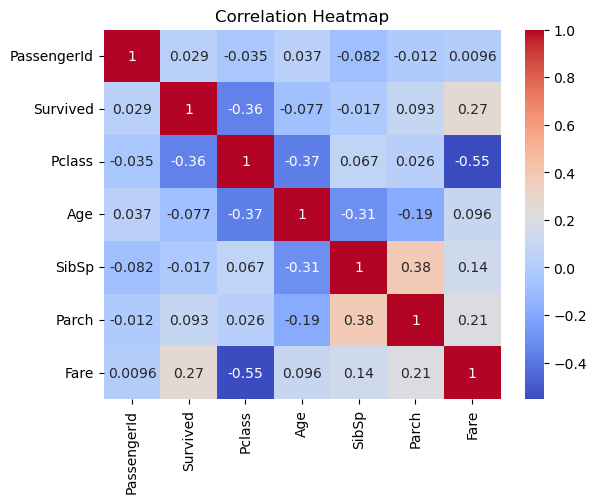

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Explanation
- Pclass has a moderate negative correlation (-0.36) with Survived, indicating that passengers in **higher** classes (lower Pclass values) were **more** likely to **survive**.
- Fare shows a positive correlation (0.27) with survival — passengers who paid higher fares had better survival chances, likely because they were in higher classes.
- Other features like Age, SibSp, and Parch have weak correlations with survival individually, suggesting limited linear impact on their own.

## 5. Data Summary and Factor Analysis
After the analysis, we determined the best and worst factors of survival after finding the relationships between different variables.
### 5.1 Most Influential Factor
The data shows that the best scenario is to be a first-class female, as shown below, the survival rate is 96,5%.

In [20]:
df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].mean()

Pclass
1    0.964706
2    0.918919
3    0.460784
Name: Survived, dtype: float64

## 5.2 Least Influential Factor
We can safely say that the opposite of the best factor must be the worst, which is a 3rd-class male with a chance of 15% of survival, as shown below:

In [21]:
df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].mean()

Pclass
1    0.396040
2    0.151515
3    0.150198
Name: Survived, dtype: float64

## 6. Logistic Regression
In this section, I will write a basic ML model.

In [23]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [24]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7412587412587412
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        87
           1       0.69      0.62      0.65        56

    accuracy                           0.74       143
   macro avg       0.73      0.72      0.72       143
weighted avg       0.74      0.74      0.74       143

Confusion Matrix:
 [[71 16]
 [21 35]]


### Model Evaluation:

The logistic regression model achieved an accuracy of ~74%, correctly predicting the survival outcome of most passengers in the test set.

It performed better at identifying non-survivors (class 0), with a precision of 77% and recall of 82%, indicating that most people predicted to have died actually did.

For survivors (class 1), the model had a lower recall of 62%, meaning it missed a significant portion of true survivors. The precision was 69%, so when it predicted someone survived, it was right most of the time.

The confusion matrix confirms this: while 71 of 87 actual non-survivors were correctly predicted, only 35 of 56 actual survivors were correctly classified.

### Conclusion:
The model captures general survival patterns well but struggles slightly with correctly identifying survivors, possibly due to class imbalance or overlapping feature distributions. Further improvement could involve feature engineering or using more advanced models.